## Regularisation – ridge, lasso
Our dataset contains various environmental indicators related to SDG 15, such as deforestation rates, protected area coverage, biodiversity indices, and other relevant variables. Our objective is to model an environmental outcome for the health of biodiversity using these indicators.

### Ridge

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/SDG_15_Life_on_Land_Dataset.csv', index_col=0)
df.head()

,WaterQualityIndex,ClimateChangeImpactScore,LandUseChange,InvasiveSpeciesCount,ConservationFunding,EcoTourismImpact,ForestCoverChange,SoilQualityIndex,WaterUsage,RenewableEnergyUsage,CarbonEmissionLevels,AgriculturalIntensity,HabitatConnectivity,SpeciesReintroductionEfforts,PollinatorDiversity,BiodiversityHealthIndex
Year,,,,,,,,,,,,,,,,
2010,35,7.542535,6.630073,39,46,1.193810,0.032204,70,33,13,22,1.419332,1.671324,9.311312,0.270434,0.194332
2010,13,1.617642,6.477132,45,18,8.484718,-4.803485,69,67,57,63,3.048794,5.815305,4.698086,0.729916,0.525779
2010,10,0.904817,9.069428,28,59,3.412444,-2.563852,72,85,37,46,7.863218,9.543694,2.080495,0.068508,0.684795
2010,36,7.060190,7.061932,37,88,9.718453,3.425382,64,85,96,60,1.065595,4.938359,2.192657,0.145065,0.926146
2010,24,8.439246,4.504786,41,88,9.118186,-1.295086,12,0,85,61,9.785784,2.114002,7.405189,0.809798,0.126345


In [ ]:
df.shape

(1000, 16)

In [ ]:
# Split data into predictors and response
X = df.drop('BiodiversityHealthIndex', axis=1)
y = df['BiodiversityHealthIndex']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)

In [ ]:
X_standardised = pd.DataFrame(X_scaled, columns=X.columns)
X_standardised.head()

,WaterQualityIndex,ClimateChangeImpactScore,LandUseChange,InvasiveSpeciesCount,ConservationFunding,EcoTourismImpact,ForestCoverChange,SoilQualityIndex,WaterUsage,RenewableEnergyUsage,CarbonEmissionLevels,AgriculturalIntensity,HabitatConnectivity,SpeciesReintroductionEfforts,PollinatorDiversity
0,-0.509823,0.915895,0.532798,0.967295,-0.129430,-1.297085,0.017923,0.689812,-0.641157,-1.290990,-0.930835,-1.237558,-1.131411,1.494660,-0.811078
1,-1.261473,-1.159761,0.479063,1.382383,-1.098165,1.226669,-1.649745,0.655167,0.539995,0.207271,0.470716,-0.670150,0.305779,-0.107952,0.797582
2,-1.363971,-1.409483,1.389846,0.206299,0.320340,-0.529103,-0.877370,0.759101,1.165311,-0.473757,-0.110415,1.006319,1.598836,-1.017291,-1.518029
3,-0.475658,0.746916,0.684528,0.828932,1.323673,1.653728,1.188117,0.481943,1.165311,1.535274,0.368164,-1.360736,0.001642,-0.978326,-1.249998
4,-0.885648,1.230038,-0.213905,1.105658,1.323673,1.445945,-0.439815,-1.319584,-1.787570,1.160709,0.402348,1.675792,-0.977884,0.832482,1.077254


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_standardised,
                                                    y,
                                                    test_size=0.2,
                                                    shuffle=True)

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge = Ridge(alpha=1)

In [ ]:
ridge.fit(X_train, y_train)

Ridge(alpha=1)

In [ ]:
b0 = float(ridge.intercept_)

In [ ]:
coeff = pd.DataFrame(ridge.coef_, X.columns, columns=['Coefficient'])

In [ ]:
print("Intercept:", float(b0))

Intercept: 0.4980533716158827


In [ ]:
coeff

,Coefficient
WaterQualityIndex,0.009747
ClimateChangeImpactScore,0.000884
LandUseChange,0.009660
InvasiveSpeciesCount,0.002738
ConservationFunding,-0.014404
EcoTourismImpact,-0.021450
ForestCoverChange,-0.014057
SoilQualityIndex,0.011865
WaterUsage,0.000830
RenewableEnergyUsage,0.001177


Since we've standardised the features in our dataset, we're now able to directly compare the coefficients with one another. This is because all the variables are scaled to the same unit. The intercept in our model represents the expected health of biodiversity when all the features (like deforestation rate, pollution levels, conservation funding, etc.) are at their average values. The coefficients tell us how the Biodiversity Health Index is expected to change with a one-unit increase in each scaled feature value.

Variables with smaller coefficients can be seen as having a lesser impact on biodiversity health; they've been more heavily penalised in the regularisation process, suggesting they're less crucial in predicting biodiversity health in our model.

## Assess the predictive accuracy of the model

In [ ]:
# Fit a basic linear model
from sklearn.linear_model import LinearRegression

# Create model object
lm = LinearRegression()

# Train model
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn import metrics

In [ ]:
train_lm = lm.predict(X_train)
train_ridge = ridge.predict(X_train)

print('Training MSE')
print('Linear:', metrics.mean_squared_error(y_train, train_lm))
print('Ridge :', metrics.mean_squared_error(y_train, train_ridge))

Training MSE
Linear: 0.08143025883419011
Ridge : 0.08143026112894491


In [ ]:
test_lm = lm.predict(X_test)
test_ridge = ridge.predict(X_test)

print('Testing MSE')
print('Linear:', metrics.mean_squared_error(y_test, test_lm))
print('Ridge :', metrics.mean_squared_error(y_test, test_ridge))

Testing MSE
Linear: 0.0806183176779572
Ridge : 0.08061643127210166


The increase in training MSE is not anything to be worried about since we want to avoid overfitting on the training set. However, the MSE values need to be contextualised to understand the model's performance better. The magnitude of the MSE can be influenced by the scale of the data and the choice of the predictive variable. Thus, it is crucial to consider these factors when assessing the model's accuracy.

As a final step, let's plot our results.


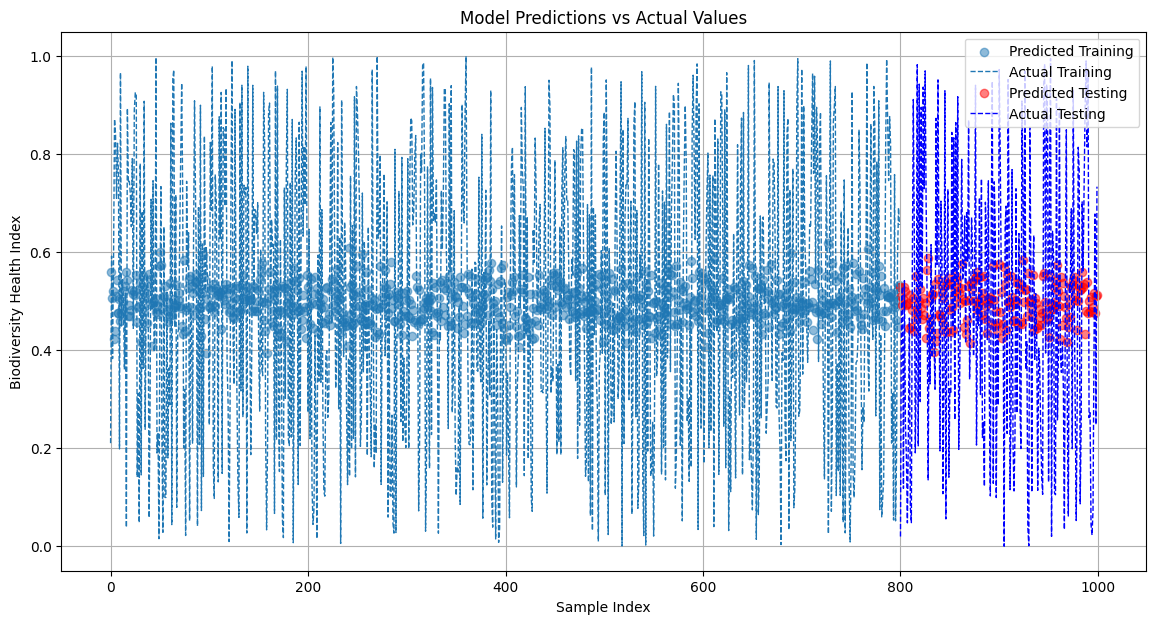

In [ ]:
# Predictions
y_pred_train = ridge.predict(X_standardised.iloc[:len(y_train)])
y_pred_test = ridge.predict(X_standardised.iloc[len(y_train):])

plt.figure(figsize=(14, 7))  # Plot size

# Plot training predictions and actual values
plt.scatter(np.arange(len(y_train)), y_pred_train, label='Predicted Training', alpha=0.5)
plt.plot(np.arange(len(y_train)), y_train, label='Actual Training', linestyle='--', linewidth=1)

# Plot testing predictions and actual values
plt.scatter(np.arange(len(y_test)) + len(y_train), y_pred_test, label='Predicted Testing', alpha=0.5, color='red')
plt.plot(np.arange(len(y_test)) + len(y_train), y_test, label='Actual Testing', linestyle='--', linewidth=1, color='blue')

plt.legend()
plt.title('Model Predictions vs Actual Values')
plt.xlabel('Sample Index')
plt.ylabel('Biodiversity Health Index')
plt.grid(True)  # Add gridlines

plt.show()

The plot indicates that the Ridge regression model predicts both the training and testing data with moderate success, showing some alignment with the actual Biodiversity Health Index values. There is a consistent scatter across the range, suggesting the model's effectiveness in handling diverse data without significant overfitting. However, it is essential to continue assessing the model's performance, especially in the context of the MSE values discussed.

## LASSO regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso(alpha=0.01)

In [ ]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [ ]:
intercept = float(lasso.intercept_)

In [ ]:
coeff = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficient'])

In [ ]:
print("Intercept:", float(intercept))

Intercept: 0.4984423773843731


In [ ]:
coeff

,Coefficient
WaterQualityIndex,0.000000
ClimateChangeImpactScore,0.000000
LandUseChange,0.000149
InvasiveSpeciesCount,0.000000
ConservationFunding,-0.004525
EcoTourismImpact,-0.011603
ForestCoverChange,-0.002493
SoilQualityIndex,0.001243
WaterUsage,0.000000
RenewableEnergyUsage,0.000000



### Interpretation of the intercept and coefficients

The interpretation of the intercept and coefficients remains consistent:

The intercept is understood as the expected BiodiversityHealthIndex when all predictors are at their mean values.

Each coefficient represents the expected change in the BiodiversityHealthIndex for a one-unit increase in the scaled predictor.

The list of coefficients demonstrates that some coefficients have been effectively reduced to zero, highlighting the impact of regularisation in feature selection and model simplification.


In [ ]:
# Assuming 'df' is the DataFrame loaded from the SDG_15_Life_on_Land_Dataset.csv
X_subset = df.drop(['BiodiversityHealthIndex'], axis=1)  # Dropping the response variable

# Assuming 'scaler' is already defined and 'y' contains 'BiodiversityHealthIndex'
X_subset_scaled = scaler.fit_transform(X_subset)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_subset_scaled,
                                                        y,
                                                        test_size=0.20,
                                                        random_state=1,
                                                        shuffle=False)

# Least squares using non-zero variables from LASSO
lm_subset = LinearRegression()

# Least squares using all predictors
lm_all = LinearRegression()

# Ridge using all predictors
ridge = Ridge()

lm_subset.fit(X_train2, y_train2)
lm_all.fit(X_train, y_train)
ridge.fit(X_train, y_train)

Ridge()

In [ ]:
# Make training set predictions for each model
train_lm_subset = lm_subset.predict(X_train2)
train_lm_all = lm_all.predict(X_train)
train_ridge = ridge.predict(X_train)
train_lasso = lasso.predict(X_train)

In [ ]:
# Make test set predictions for each model
test_lm_subset = lm_subset.predict(X_test2)
test_lm_all = lm_all.predict(X_test)
test_ridge = ridge.predict(X_test)
test_lasso = lasso.predict(X_test)

In [ ]:
# Dictionary of results
results_dict = {'Training MSE':
                    {
                        "Least Squares, Subset": metrics.mean_squared_error(y_train2, train_lm_subset),
                        "Least Squares, All": metrics.mean_squared_error(y_train, train_lm_all),
                        "Ridge": metrics.mean_squared_error(y_train, train_ridge),
                        "LASSO": metrics.mean_squared_error(y_train, train_lasso)
                    },
                    'Test MSE':
                    {
                        "Least Squares, Subset": metrics.mean_squared_error(y_test2, test_lm_subset),
                        "Least Squares, All": metrics.mean_squared_error(y_test, test_lm_all),
                        "Ridge": metrics.mean_squared_error(y_test, test_ridge),
                        "LASSO": metrics.mean_squared_error(y_test, test_lasso)
                    }
                }

In [ ]:
# Create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)

In [ ]:
# View the results
results_df

,Training MSE,Test MSE
"Least Squares, Subset",0.081708,0.079791
"Least Squares, All",0.081430,0.080618
Ridge,0.081430,0.080616
LASSO,0.082204,0.080526


In [ ]:
# we want to plot the train and test response variables as a continuous line
train_plot = pd.concat([y_train, pd.Series(y_test.iloc[0], index=['Next Time Point'])])

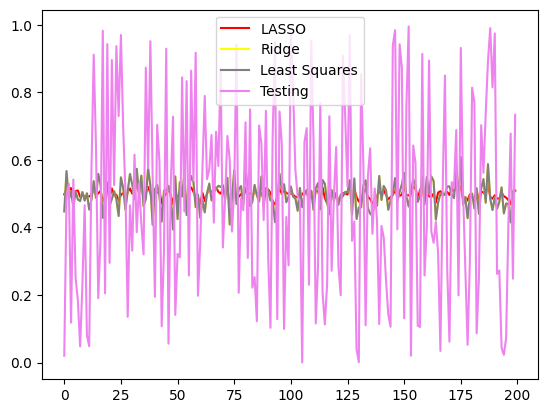

In [ ]:
plt.plot(np.arange(len(y_test)), lasso.predict(X_test), label='LASSO',color='red')
plt.plot(np.arange(len(y_test)), ridge.predict(X_test), label='Ridge', color='yellow')
plt.plot(np.arange(len(y_test)), lm_all.predict(X_test), label='Least Squares', color='grey')
plt.plot(np.arange(len(y_test)), y_test.values, label='Testing', color='violet')
plt.legend()

plt.show()